In [1]:
#importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
# loading Data
dataset= load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']= df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#Filter For Data Scientist Data
#df_DS= df[df["job_title_short"]=="Data Scientist"].copy()

In [2]:
df_DS_US=df[(df["job_title_short"]  == "Data Scientist") & (df["job_country"]== "United States")].copy()

# drop NAN values from salary year avg
df_DS_US=df_DS_US.dropna(subset=["salary_year_avg"])

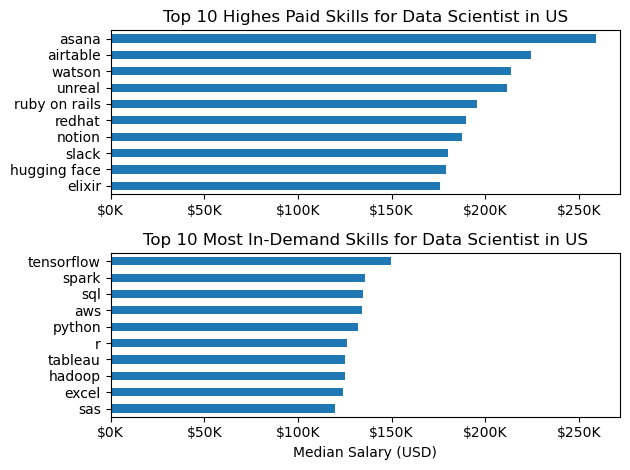

In [3]:
df_DS_US=df_DS_US.explode('job_skills')
df_DS_US[['salary_year_avg','job_skills']]

df_DS_US_group=df_DS_US.groupby('job_skills')["salary_year_avg"].agg(["count", "median"])
df_DS_US_top_pay=df_DS_US_group.sort_values(by='median', ascending=False).head(10)
df_DS_US_skills=df_DS_US_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False).head(10)
df_DS_US_skills

fig, ax=plt.subplots(2,1)

df_DS_US_top_pay [::-1].plot(kind="barh", y="median", ax=ax[0], legend=False)
ax[0].set_title("Top 10 Highes Paid Skills for Data Scientist in US")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_DS_US_skills[::-1].plot(kind="barh", y="median", ax=ax[1],legend=False)
ax[1].set_title("Top 10 Most In-Demand Skills for Data Scientist in US")
ax[1].set_xlabel("Median Salary (USD)")
ax[1].set_ylabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K' ))

ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()

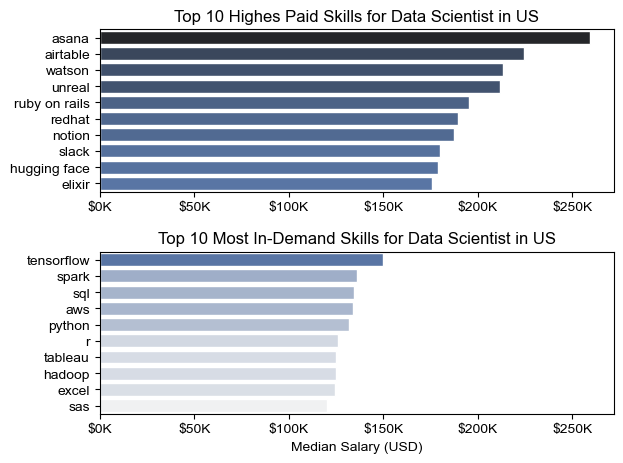

In [15]:
fig, ax=plt.subplots(2,1)

sns.set_theme(style='ticks')
#Top 10 Highest paid Skills for Data Scientist
sns.barplot(data=df_DS_US_top_pay ,x='median', y=df_DS_US_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()

#df_DS_US_top_pay [::-1].plot(kind="barh", y="median", ax=ax[0], legend=False)
ax[0].set_title("Top 10 Highes Paid Skills for Data Scientist in US")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-demand skills for Data Scientist
sns.barplot(data=df_DS_US_skills,x='median' ,y=df_DS_US_skills.index, ax=ax[1], hue="median" ,palette='light:b')
ax[1].legend().remove()
# df_DS_US_skills[::-1].plot(kind="barh", y="median", ax=ax[1],legend=False)
ax[1].set_title("Top 10 Most In-Demand Skills for Data Scientist in US")
ax[1].set_xlabel("Median Salary (USD)")
ax[1].set_ylabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K' ))

ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()

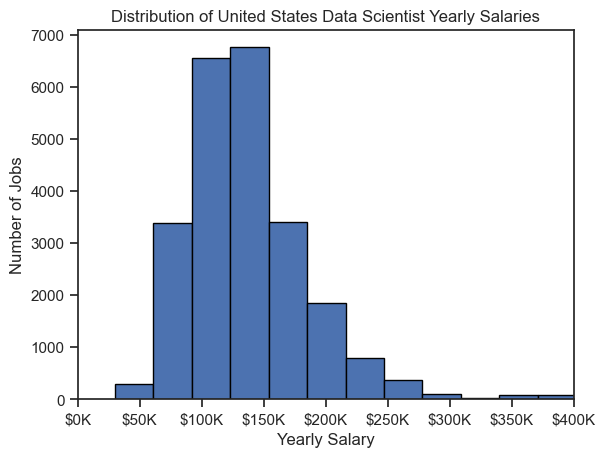

In [16]:
df_DS_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
plt.xlim(0,400000)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title("Distribution of United States Data Scientist Yearly Salaries")
plt.ylabel("Number of Jobs")
plt.xlabel("Yearly Salary")
plt.show()

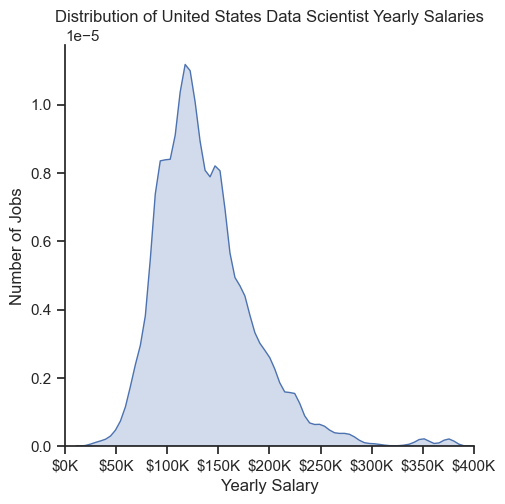

In [20]:
sns.displot(df_DS_US['salary_year_avg'], kind='kde', fill=True)


plt.xlim(0,400000)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title("Distribution of United States Data Scientist Yearly Salaries")
plt.ylabel("Number of Jobs")
plt.xlabel("Yearly Salary")
plt.show()

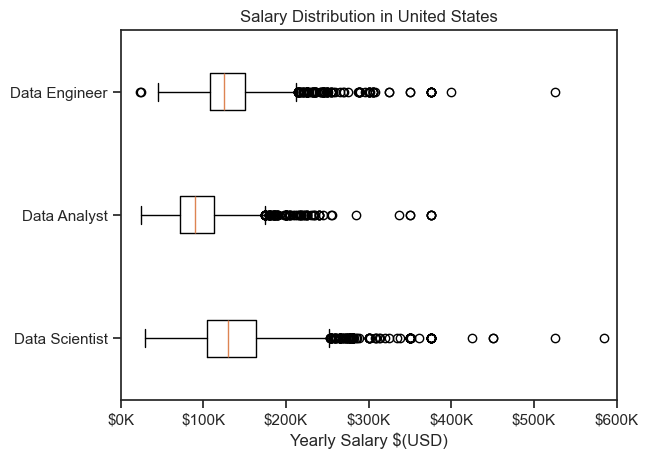

In [33]:
job_titles= ['Data Scientist','Data Analyst','Data Engineer']

df_US=df[(df["job_title_short"].isin(job_titles)) &  (df['job_country']=="United States")].copy()
df_US=df_US.dropna(subset=['salary_year_avg'])
job_list= [df_US[df_US['job_title_short']==job_title]['salary_year_avg']for job_title in job_titles]

plt.boxplot(job_list,  labels=job_titles , vert=False)
plt.title("Salary Distribution in United States")
plt.xlabel("Yearly Salary $(USD)")
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

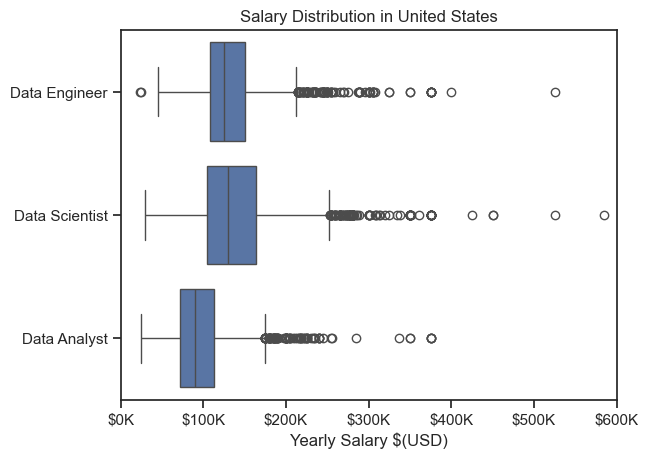

In [34]:

sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')

plt.title("Salary Distribution in United States")
plt.xlabel("Yearly Salary $(USD)")
plt.ylabel("")
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()